In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from aldiscore.prediction import utils
from aldiscore import ROOT

In [83]:
data_dir = Path("/hits/fast/cme/bodynems/data/paper")
feat_df, *_ = utils.load_features(data_dir)
# feat_df.columns = clean_feat_names
feat_df = feat_df[["is_dna", "num_seqs", "max.seq_length"]]

Dropping 0 NaN rows...


#### run scripts/compute_features.py first!
computes detailed perf_df for feature extraction, stored in logs/perf/...parquet

In [ ]:
perf_dir = ROOT.parent / "logs" / "perf"
perf_file = sorted(os.listdir(perf_dir))[-1]
print(perf_file)
perf_df = pd.read_parquet(perf_dir / perf_file)
# perf_df = pd.concat([perf_df, feat_df], axis=1)
perf_df

2025-10-13_17-00-59.parquet


_init_basics  \
source        dataset                                            
treebase_v1   21420_1.phy                             0.010204   
              14688_14.phy                            0.015336   
              21918_2.phy                             0.016275   
              17890_0.phy                             0.016124   
              15560_1.phy                             0.011913   
...                                                        ...   
bralibase_k15 SRP_bact.apsi-54.sci-103.no-1           0.004451   
              SRP_euk_arch.apsi-43.sci-74.no-1        0.002303   
              Retroviral_psi.apsi-91.sci-76.no-1      0.002047   
              IRES_HCV.apsi-88.sci-67.no-2            0.005284   
              IRES_Picorna.apsi-86.sci-83.no-1        0.002131   

                                                  _init_char_dists  _init_psa  \
source        dataset                                                           
treebase_v1   21420_1.phy                                 0.000643   0.014098   
              14688_14.phy                                0.001035   0.063591   
              21918_2.phy                                 0.001001   0.106624   
              17890_0.phy                                 0.001521   0.208153   
              15560_1.phy                                 0.001443   0.126042   
...                                                            ...        ...   
bralibase_k15 SRP_bact.apsi-54.sci-103.no-1               0.001026   0.039485   
              SRP_euk_arch.apsi-43.sci-74.no-1            0.000785   0.179028   
              Retroviral_psi.apsi-91.sci-76.no-1          0.000433   0.034561   
              IRES_HCV.apsi-88.sci-67.no-2                0.001744   0.126516   
              IRES_Picorna.apsi-86.sci-83.no-1            0.000647   0.116214   

                                                  _init_psa_index_map  \
source        dataset                                                   
treebase_v1   21420_1.phy                                    0.002064   
              14688_14.phy                                   0.007456   
              21918_2.phy                                    0.002844   
              17890_0.phy                                    0.005471   
              15560_1.phy                                    0.008345   
...                                                               ...   
bralibase_k15 SRP_bact.apsi-54.sci-103.no-1                  0.004773   
              SRP_euk_arch.apsi-43.sci-74.no-1               0.004871   
              Retroviral_psi.apsi-91.sci-76.no-1             0.005713   
              IRES_HCV.apsi-88.sci-67.no-2                   0.005241   
              IRES_Picorna.apsi-86.sci-83.no-1               0.006369   

                                                  _data_type  _num_sequences  \
source        dataset                                                          
treebase_v1   21420_1.phy                           0.000017        0.000015   
              14688_14.phy                          0.000021        0.000017   
              21918_2.phy                           0.000021        0.000019   
              17890_0.phy                           0.000019        0.000015   
              15560_1.phy                           0.000017        0.000017   
...                                                      ...             ...   
bralibase_k15 SRP_bact.apsi-54.sci-103.no-1         0.000004        0.000002   
              SRP_euk_arch.apsi-43.sci-74.no-1      0.000003        0.000002   
              Retroviral_psi.apsi-91.sci-76.no-1    0.000004        0.000002   
              IRES_HCV.apsi-88.sci-67.no-2          0.000004        0.000002   
              IRES_Picorna.apsi-86.sci-83.no-1      0.000004        0.000003   

                                                  _sequence_length  \
source        dataset                                                
treeba

In [4]:
# Median execution time for all sources
perf_df.sum(axis=1).groupby("source").median().sort_values(ascending=False).to_frame().T

source,treebase_v1,prefab4,arthropod,bali3,bali2dnaf,bali2dna,bralibase_k15,formatt_sabmark,bralibase_k7,sabre,formatt_homstrad,ox,bralibase_k5
0,8.837893,1.202515,0.747213,0.538428,0.293226,0.284487,0.121383,0.053945,0.041446,0.037519,0.03511,0.033202,0.028417


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

heavy_cols = ["_init_psa"]
plot_df = perf_df[heavy_cols].copy()
plot_df.columns = ["PSA"]
drop_cols = heavy_cols + ["_ent_randomness"]
plot_df["rest"] = perf_df.drop(drop_cols, errors="ignore", axis=1).sum(axis=1)

input_sizes = (feat_df["num_seqs"] * feat_df["max.seq_length"]).loc[plot_df.index]
# input_sizes = (feat_df["num_seqs"]).loc[plot_df.index]
plot_df["Input Size"] = input_sizes
plot_df.shape

(11431, 3)

In [13]:
plot_df = plot_df.melt(
    id_vars=["Input Size"],
    value_vars=["PSA", "rest"],
    var_name="Computation",
    value_name="Time (s)",
)
plot_df

,Input Size,Computation,Time (s)
0,1098,PSA,0.014098
1,2754,PSA,0.063591
2,3798,PSA,0.106624
3,5760,PSA,0.208153
4,4472,PSA,0.126042
...,...,...,...
22857,1560,rest,0.104693
22858,4590,rest,0.137375
22859,1800,rest,0.084185
22860,5820,rest,0.072967


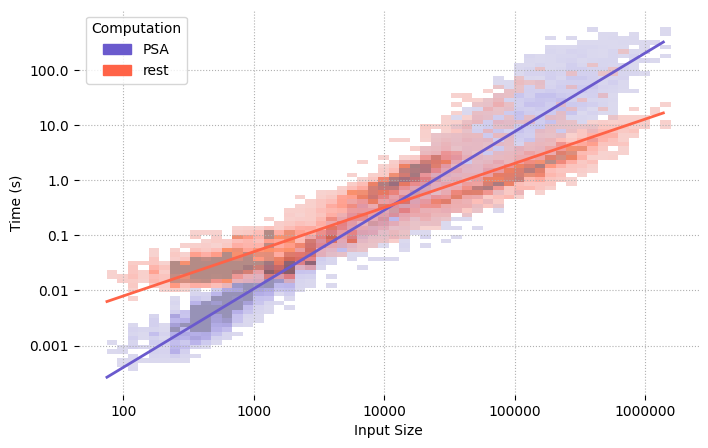

In [14]:
from sklearn.linear_model import LinearRegression

colors = [sn.color_palette("mako")[i] for i in [1, 3]]
colors = ["slateblue", "darkolivegreen"]

x_log = np.log10(plot_df["Input Size"])
y_log = np.log10(plot_df["Time (s)"])

plt.figure(figsize=(8, 5))
ax = sn.histplot(
    x=x_log,
    y=y_log,
    hue=plot_df["Computation"],
    palette=["slateblue", "tomato"],
    binwidth=0.08,
    alpha=0.6,
    common_norm=False,
    pthresh=0,
    pmax=0.7,
)
log_xticks = np.arange(2, 7)
log_yticks = np.arange(-3, 3)

plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.xticks(log_xticks, labels=10**log_xticks)
plt.yticks(log_yticks, labels=10.0**log_yticks)

ax.grid(linestyle=":")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

sn.move_legend(ax, "upper left")

colors = ["slateblue", "tomato"]
for i, computation in enumerate(plot_df["Computation"].unique()):
    mask = plot_df["Computation"] == computation
    x_vals = x_log[mask].to_numpy().reshape(-1, 1)
    y_vals = y_log[mask].to_numpy()
    model = LinearRegression().fit(x_vals, y_vals)
    x_fit = np.linspace(x_vals.min(), x_vals.max(), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    ax.plot(x_fit.flatten(), y_fit, color=colors[i], lw=2, label=f"{computation} fit")


plt.savefig(
    ROOT.parent / "figures" / "computation_psa_vs_rest.svg", bbox_inches="tight"
)